In [30]:
library(stringr)

library(dplyr)

library(ggplot2)

fourteen_df <- read.csv("2014.csv")

In [31]:
# race
# city
# race*city

fourteen_df <- filter(fourteen_df, fourteen_df$city != " ")

fourteen_df <- filter(fourteen_df, fourteen_df$race != " ")

In [32]:
quantconvert <- function(v) {
    n <- length(v)
    column <- rep(0, n)
    
    for (i in 1:n) {
        if (v[i] == "Y") {
            column[i] <- 1
        }
        else if (v[i] == "N"){
            column[i] <- 0
        }
    }
    return(column)
}

fourteen_df$arstmade_num <- quantconvert(fourteen_df$arstmade)

In [11]:
fourteen_df$arstmade_num <- factor(fourteen_df$arstmade_num)

city_arstmade <- glm(arstmade_num ~ city, data = fourteen_df, family = "binomial")

summary(city_arstmade)


Call:
glm(formula = arstmade_num ~ city, family = "binomial", data = fourteen_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8105  -0.4898  -0.4644  -0.3275   2.4299  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -1.08014    0.02783 -38.817  < 2e-16 ***
cityBROOKLYN      -0.98001    0.03899 -25.133  < 2e-16 ***
cityMANHATTAN      0.13562    0.03818   3.552 0.000382 ***
cityQUEENS        -1.09274    0.03989 -27.391  < 2e-16 ***
citySTATEN ISLAND -1.81850    0.06940 -26.203  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38813  on 45786  degrees of freedom
Residual deviance: 36619  on 45782  degrees of freedom
AIC: 36629

Number of Fisher Scoring iterations: 5


In [17]:
fourteen_df$arstmade_num <- factor(fourteen_df$arstmade_num)

race_arstmade <- glm(arstmade_num ~ race, data = fourteen_df, family = "binomial")

summary(race_arstmade)


Call:
glm(formula = arstmade_num ~ race, family = "binomial", data = fourteen_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6775  -0.5529  -0.5529  -0.5271   2.2020  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.21242    0.07021 -31.510  < 2e-16 ***
raceB        0.41151    0.07258   5.670 1.43e-08 ***
raceI       -0.11916    0.26350  -0.452 0.651129    
raceP        0.85765    0.08443  10.158  < 2e-16 ***
raceQ        0.70443    0.07500   9.393  < 2e-16 ***
raceU        0.25118    0.18910   1.328 0.184080    
raceW        0.30869    0.08094   3.814 0.000137 ***
raceZ        0.69589    0.11874   5.861 4.61e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38813  on 45786  degrees of freedom
Residual deviance: 38584  on 45779  degrees of freedom
AIC: 38600

Number of Fisher Scoring iterations: 4


In [7]:
fourteen_df$arstmade_num <- factor(fourteen_df$arstmade_num)

race_city_arstmade <- glm(arstmade_num ~ race + city + race*city, data = fourteen_df, family = "binomial")

summary(race_city_arstmade)


Call:
glm(formula = arstmade_num ~ race + city + race * city, family = "binomial", 
    data = fourteen_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8775  -0.5354  -0.4871  -0.3736   2.6017  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -0.88239    0.34324  -2.571 0.010148 *  
raceB                   -0.22309    0.34559  -0.646 0.518580    
raceI                   -1.82566    1.08833  -1.677 0.093448 .  
raceP                   -0.21014    0.35197  -0.597 0.550478    
raceQ                   -0.13061    0.34662  -0.377 0.706317    
raceU                   -0.41689    0.57440  -0.726 0.467969    
raceW                   -0.68738    0.38907  -1.767 0.077271 .  
raceZ                    0.09015    0.38482   0.234 0.814775    
cityBROOKLYN            -1.34469    0.38908  -3.456 0.000548 ***
cityMANHATTAN           -0.21622    0.39224  -0.551 0.581461    
cityQUEENS              -1.52925    0.35456  -4

In [35]:
logit2prob <- function(logit){
    odds <- exp(logit)
    prob <- odds / (1 + odds)
    return(prob)
}



In [34]:
logit2prob2 <- function(model){
    int = coef(model)[1]
    n = length(model)
    output = rep(1,n)
    output[1] = exp(int)/(1 + exp(int))
    for (i in 2:n) {
    logit <- int + coef(model)[i]
    odds <- exp(logit)
    prob <- odds / (1 + odds)
    output[i] <- prob
}
    return(output)
}



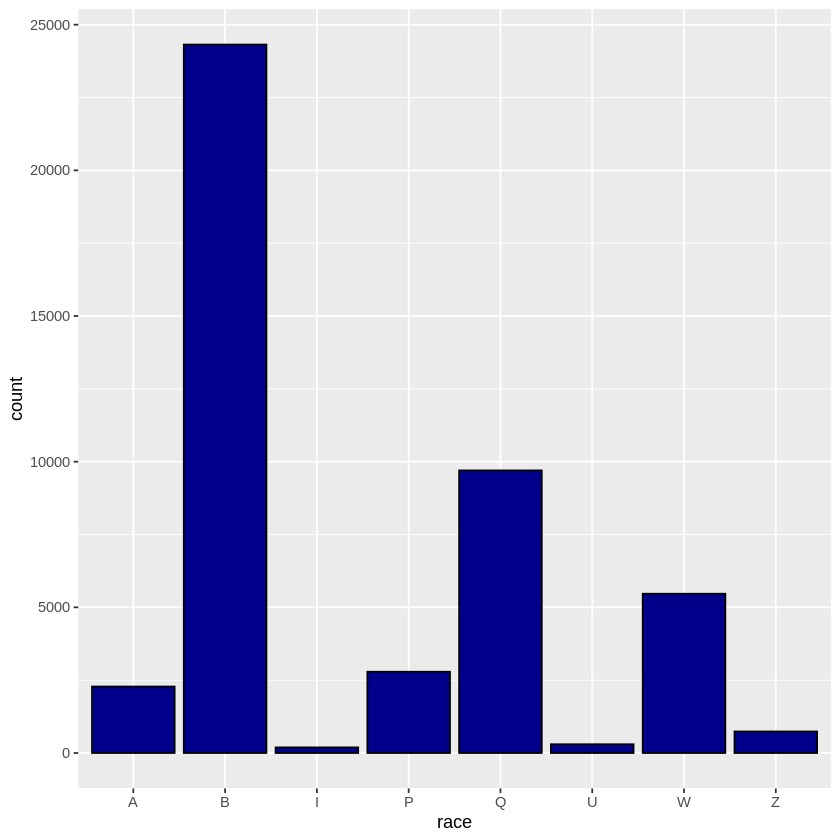

In [28]:
ggplot(fourteen_df, aes(x = race)) +
    geom_bar(fill = "darkblue", colour = "black")

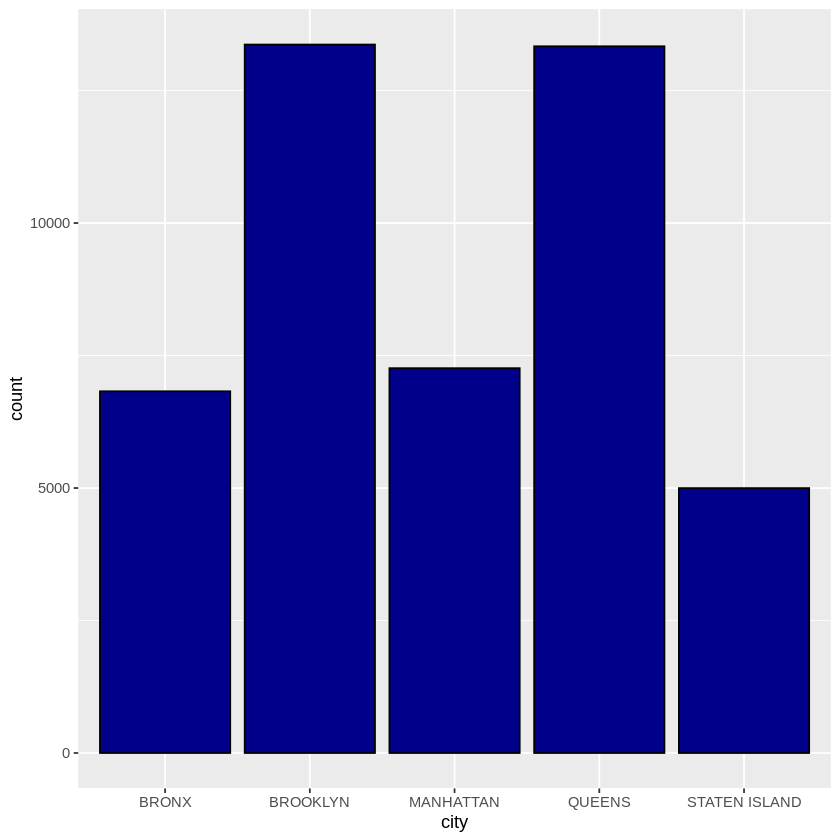

In [29]:
ggplot(fourteen_df, aes(x = city)) +
    geom_bar(fill = "darkblue", colour = "black")

In [33]:
fourteen_df$arstmade_num <- factor(fourteen_df$arstmade_num)

race_city_arstmade <- glm(arstmade_num ~ race + city, data = fourteen_df, family = "binomial")

summary(race_city_arstmade)


Call:
glm(formula = arstmade_num ~ race + city, family = "binomial", 
    data = fourteen_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8517  -0.5227  -0.4813  -0.3474   2.5828  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -1.30231    0.07885 -16.516  < 2e-16 ***
raceB              0.14617    0.07511   1.946  0.05165 .  
raceI             -0.20027    0.26717  -0.750  0.45349    
raceP              0.28569    0.08795   3.248  0.00116 ** 
raceQ              0.32171    0.07751   4.150 3.32e-05 ***
raceU             -0.12642    0.19333  -0.654  0.51316    
raceW              0.23878    0.08319   2.870  0.00410 ** 
raceZ              0.12989    0.12261   1.059  0.28944    
cityBROOKLYN      -0.94098    0.03983 -23.627  < 2e-16 ***
cityMANHATTAN      0.15313    0.03855   3.973 7.11e-05 ***
cityQUEENS        -1.05664    0.04128 -25.599  < 2e-16 ***
citySTATEN ISLAND -1.79655    0.07053 -25.474  < 2e-16 ***
---
Signi

In [36]:
logit2prob(coef(race_city_arstmade))

(Intercept)             raceB             raceI             raceP 
        0.2137763         0.5364785         0.4500988         0.5709417 
            raceQ             raceU             raceW             raceZ 
        0.5797399         0.4684365         0.5594135         0.5324263 
     cityBROOKLYN     cityMANHATTAN        cityQUEENS citySTATEN ISLAND 
        0.2807017         0.5382087         0.2579524         0.1422718

In [37]:
logit2prob2(race_city_arstmade)

[1] 0.21377627 0.23936977 0.18204059 0.26568683 0.27277158 0.19329612
 [7] 0.25663562 0.23641713 0.09592941 0.24063927 0.08635704 0.04315432
[13]         NA         NA         NA         NA         NA         NA
[19]         NA         NA         NA         NA         NA         NA
[25]         NA         NA         NA         NA         NA         NA